In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [361]:
plt.style.use("fivethirtyeight")

In [381]:
data = pd.read_csv("actress.csv")

In [382]:
data.head()

,id,name,imgurl,birthday,height,cup_size,bust,waist,hips,birthplace,hobby
0,1,波多野結衣,https://pics.javhoo.net/2016/02/2jv_a-1.jpg,1988-05-24,163cm,D,88cm,59cm,85cm,京都府,ゲーム
1,2,上原亜衣,https://pics.javhoo.net/2016/02/2ny_a.jpg,1992-11-12,NaN,E,83cm,57cm,82cm,NaN,NaN
2,3,北条麻妃,https://pics.javhoo.net/2016/02/2lk.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,風間ゆみ,https://pics.javhoo.net/2016/02/2t_a.jpg,1979-02-22,160cm,F,93cm,60cm,90cm,東京都,水泳
4,5,JULIA,https://pics.javhoo.net/2016/02/2de_a.jpg,1987-05-25,158cm,J,101cm,55cm,84cm,NaN,"自分磨き,簿記二級"


In [392]:
draw_dic = {}
for feature in ["birthday", "cup_size", "height", "bust", "waist", "hips"]:
    if feature == "birthday":
        df = data.dropna(subset=[feature])
        df["age"] = df[feature].apply(lambda x:2021-int(x.split("-")[0]))
        draw_dic["age"] = df[["name", "age"]]
    elif feature == "cup_size":
        df = data.dropna(subset=[feature])
        draw_dic[feature] = df[["name", feature]]
    else:
        df = data.dropna(subset=[feature])
        df[feature] = df[feature].apply(lambda x:int(x.replace("cm", "")))
        draw_dic[feature] = df[["name", feature]]

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [460]:
def draw(df, feature, color):
    dic = {}
    for num in df[feature]:
        if (num//5) not in dic:
            dic[num//5] = 1
        else:
            dic[num//5] += 1
    flow = []
    for k,v in dic.items():
        flow.append(k)
    for tag in range(min(flow), max(flow)):
        if tag not in dic:
            dic[tag] = 0
    dic = sorted(dic.items(), key=lambda x:x[0])
    print(dic)
    print(f"total:{len(df)}")
    print(f"max:{df.sort_values(feature, ascending = True).head(1)}")
    print(f"min:{df.sort_values(feature, ascending = False).head(1)}")
    rng = []
    for x in range(5*(df[feature].min()//5), 5*(df[feature].max()//5)+1, 5):
        rng.append(f"{x}-{x+4}")
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.bar(range(len(dic)), [x[1] for x in dic], align='center', label=feature, color=color)
    plt.xticks(range(len(dic)),rng)
    plt.legend(loc = 0, prop = {"size":25})
    start_loc = -0.05
    for number in [x[1] for x in dic]:
        plt.text(start_loc, number+10, (str(number)), fontsize=15)
        start_loc+=1
    plt.show()

[(4, 6), (5, 348), (6, 726), (7, 1059), (8, 706), (9, 254), (10, 146), (11, 41), (12, 7), (13, 1)]
total:3294
max:      name  age
2105  相島奈央   23
min:      name  age
6364  藤田亮子   66


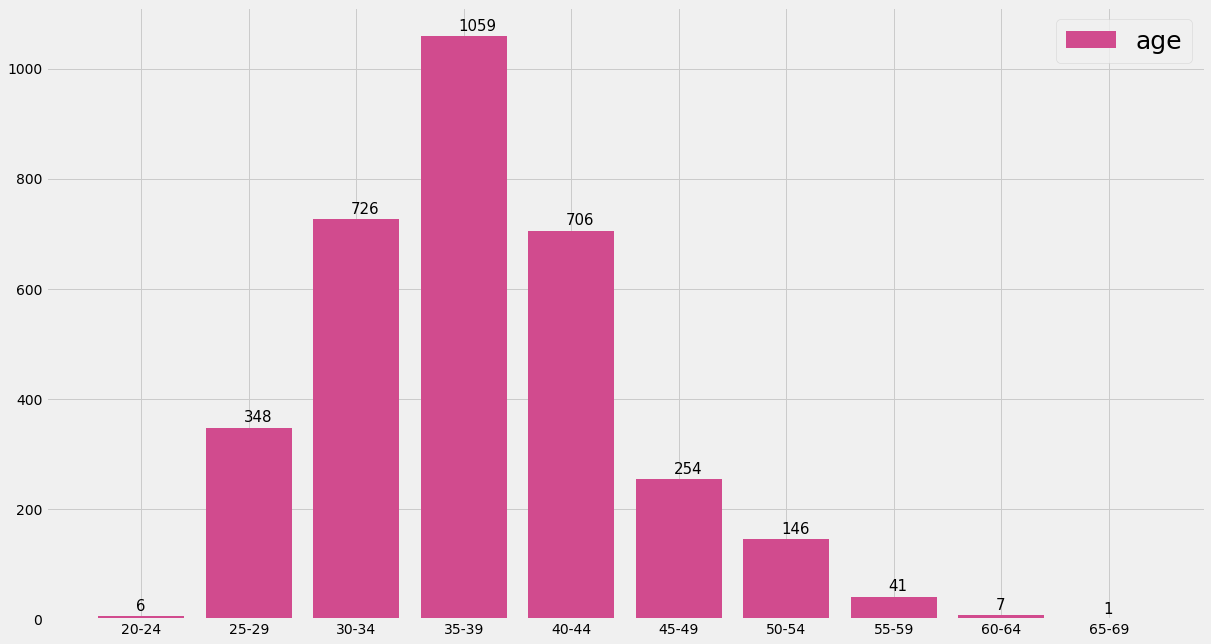

[(26, 1), (27, 2), (28, 15), (29, 164), (30, 665), (31, 1243), (32, 1120), (33, 464), (34, 115), (35, 26), (36, 2)]
total:3817
max:      name  height
1412  雪野りこ     134
min:      name  height
5052  内田真由     182


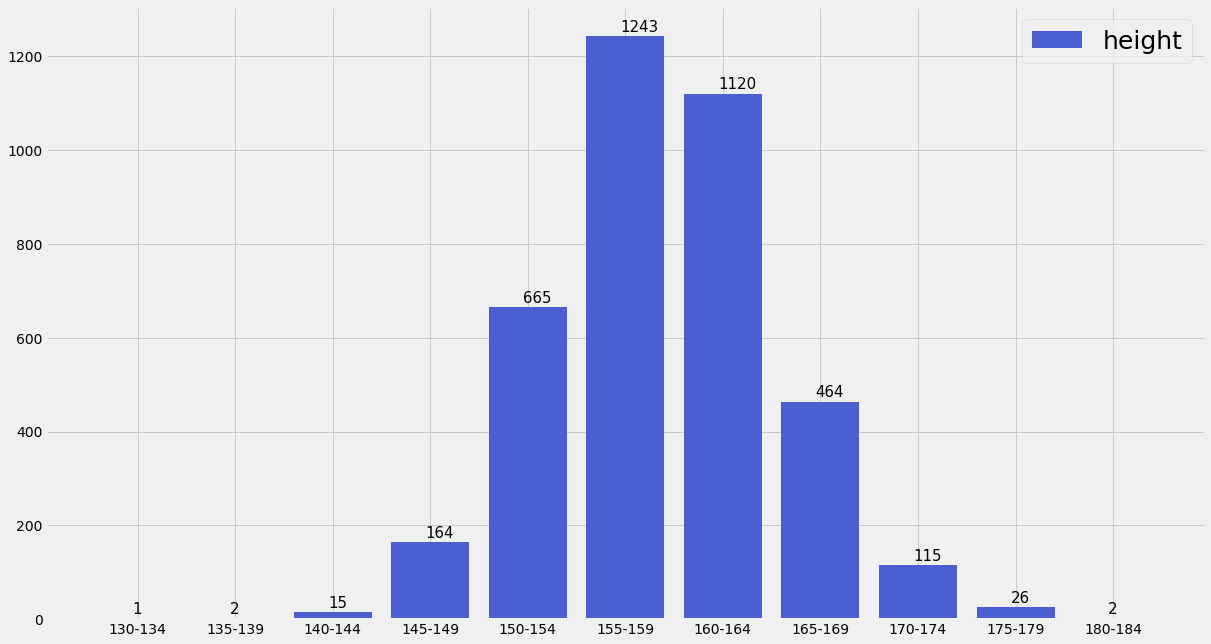

[(12, 1), (13, 1), (14, 9), (15, 65), (16, 1686), (17, 1946), (18, 729), (19, 271), (20, 130), (21, 42), (22, 28), (23, 9), (24, 13), (25, 1), (26, 1), (27, 1), (28, 0), (29, 0), (30, 2)]
total:4935
max:       name  bust
1462  原沢ゆうあ    60
min:     name  bust
4774  山岸蘭   153


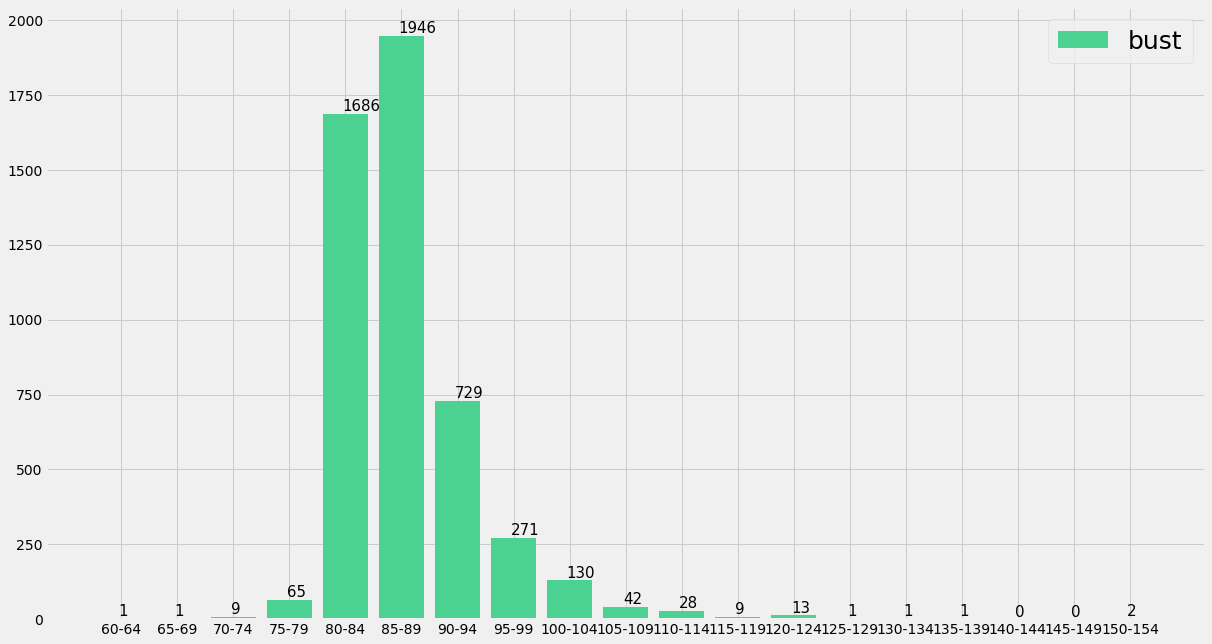

[(9, 1), (10, 99), (11, 3168), (12, 1479), (13, 122), (14, 22), (15, 9), (16, 3), (17, 4), (18, 7), (19, 2), (20, 1)]
total:4917
max:      name  waist
3348  花澤アン     48
min:       name  waist
3444  沙月みちる    100


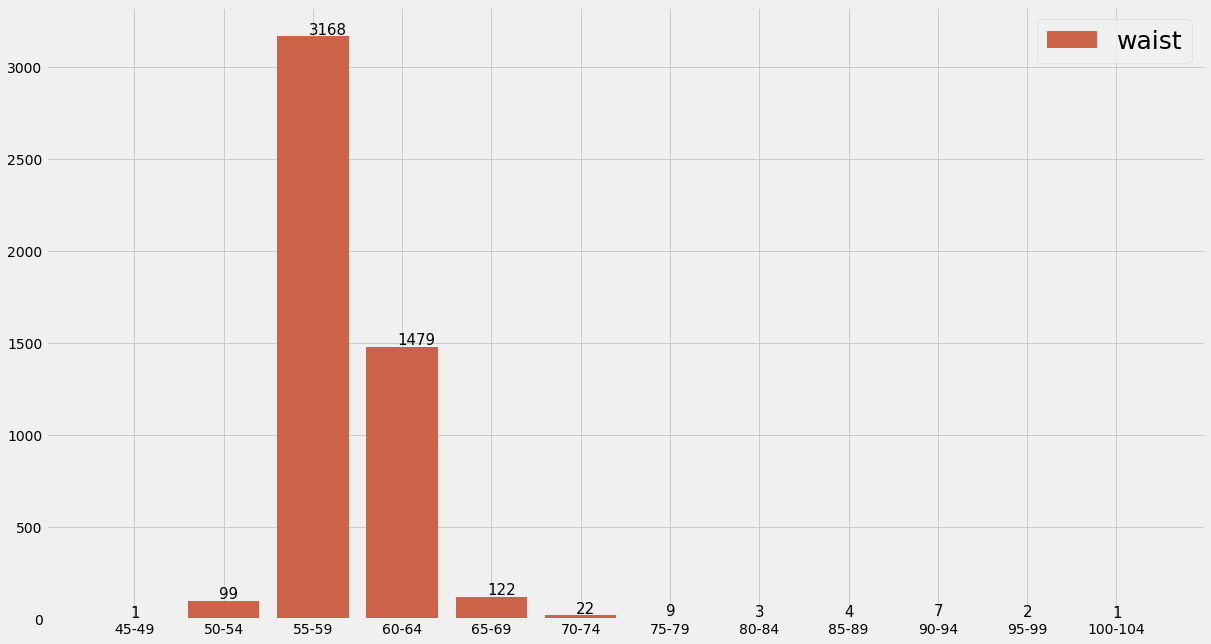

[(11, 4), (12, 3), (13, 1), (14, 1), (15, 33), (16, 1385), (17, 2898), (18, 468), (19, 85), (20, 22), (21, 7), (22, 2), (23, 0), (24, 3), (25, 1)]
total:4913
max:       name  hips
3111  天野こころ    58
min:       name  hips
3444  沙月みちる   125


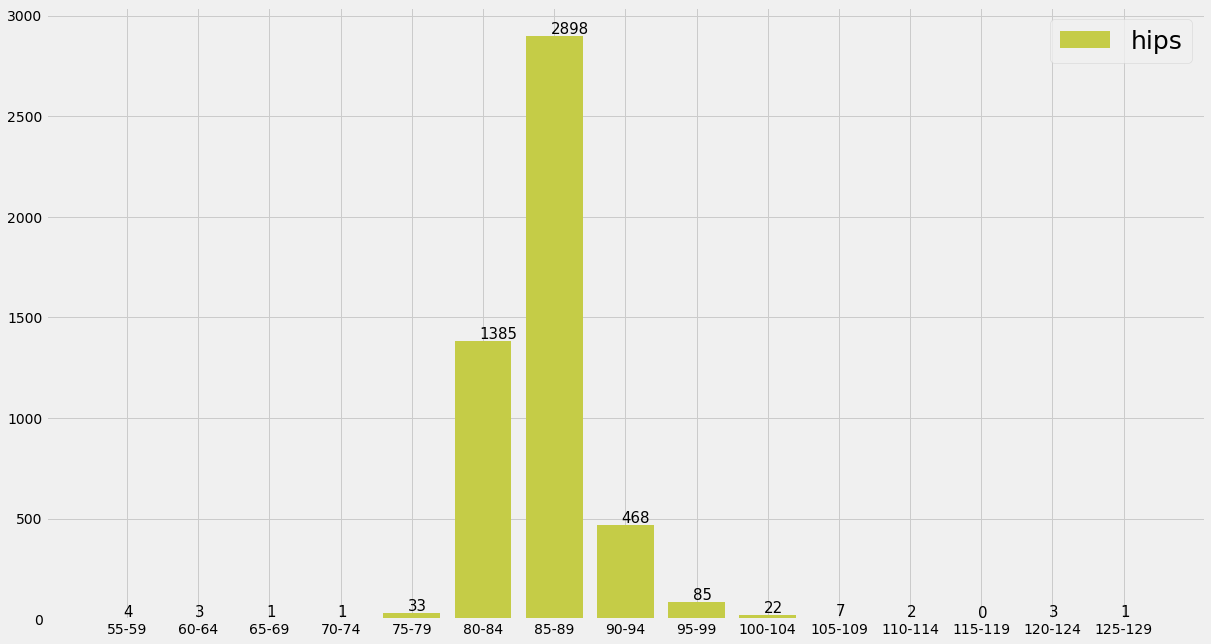

In [461]:
color_set = {"age":"#d14b8e", "height":"#4b5fd1", "bust":"#4bd192", "waist":"#cc6247", "hips":"#c5cc47"}
for feature in ["age", "height", "bust", "waist", "hips"]:
    draw(draw_dic[feature], feature, color_set[feature])

In [463]:
def draw_cup(df, color):
    dic = {}
    for size in df["cup_size"]:
        if size not in dic:
            dic[size] = 1
        else:
            dic[size] += 1
    dic = sorted(dic.items(), key=lambda x:x[0])
    print(dic)
    print(f"total:{len(df)}")
    print(f"max:{df.sort_values('cup_size', ascending = True).head(1)}")
    print(f"min:{df.sort_values('cup_size', ascending = False).head(1)}")
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.bar(range(len(dic)), [x[1] for x in dic], align='center', label="cup_size", color=color)
    plt.xticks(range(len(dic)),[x[0] for x in dic])
    plt.legend(loc = 0, prop = {"size":25})
    start_loc = -0.05
    for number in [x[1] for x in dic]:
        plt.text(start_loc, number+10, (str(number)), fontsize=15)
        start_loc+=1
    plt.show()

[('A', 22), ('B', 234), ('C', 781), ('D', 866), ('E', 693), ('F', 512), ('G', 355), ('H', 175), ('I', 102), ('J', 39), ('K', 21), ('L', 9), ('M', 4), ('N', 1), ('O', 2), ('P', 2), ('Q', 1)]
total:3819
max:       name cup_size
2412  杉崎ななか        A
min:        name cup_size
5139  志紋ELLE        Q


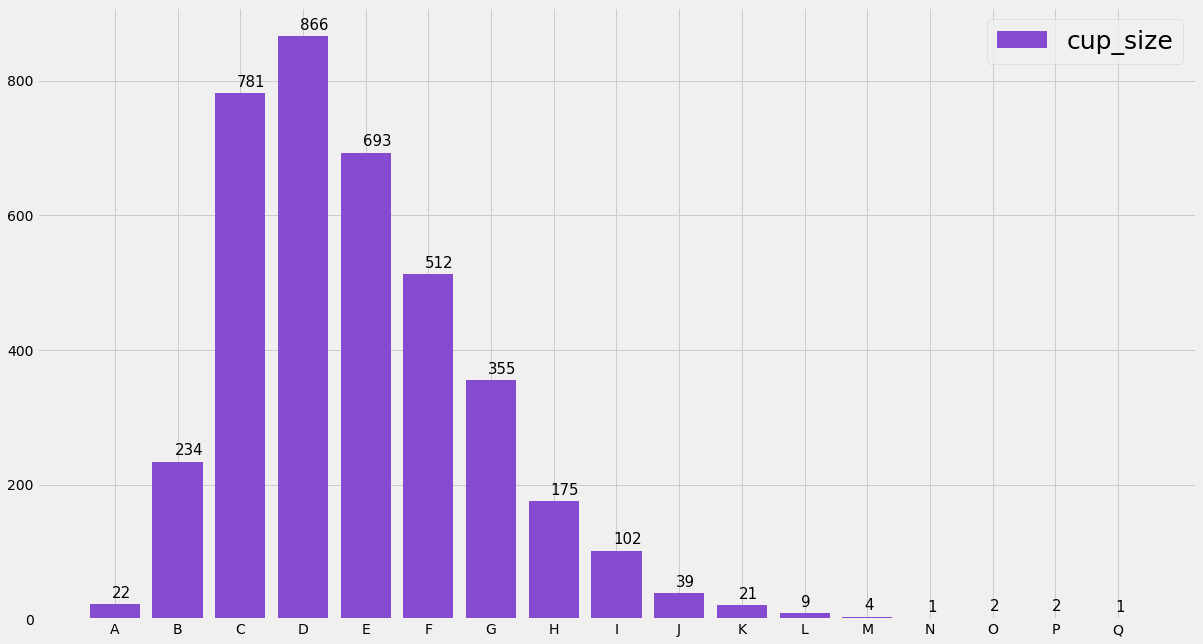

In [405]:
draw_cup(draw_dic["cup_size"], "#854bd1")

# Euclidian

In [340]:
complete = data.dropna()
complete["age"] = complete["birthday"].apply(lambda x: 2021 - int(x.split("-")[0]))
for feature in ["height", "bust", "waist", "hips"]:
    complete[feature] = complete[feature].apply(lambda x: float(x.replace("cm", "")))
complete["cup_size"] = complete["cup_size"].apply(lambda x: ord(x)-64)

In [81]:
complete.head()

,id,name,birthday,height,cup_size,bust,waist,hips,age
0,1,波多野結衣,1988-05-24,163.0,4,88.0,59.0,85.0,33
3,4,風間ゆみ,1979-02-22,160.0,6,93.0,60.0,90.0,42
4,5,JULIA,1987-05-25,158.0,10,101.0,55.0,84.0,34
5,6,沖田杏梨,1986-10-28,168.0,11,101.0,59.0,92.0,35
6,7,Rio（柚木ティナ）,1986-10-29,154.0,3,84.0,58.0,83.0,35


In [83]:
std_data = complete[["name", "age", "height", "cup_size", "bust", "waist", "hips"]]

In [84]:
for feature in ["age", "height", "cup_size", "bust", "waist", "hips"]:
    std_data[feature] = (std_data[feature]-std_data[feature].mean())/std_data[feature].std()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
std_data = std_data.reset_index()

In [102]:
std_data.drop("index", axis=1, inplace=True)

In [141]:
std_data["idx"] = std_data.index

In [164]:
dic = std_data.to_dict()

In [185]:
def _get_top5_similar(person_idx, data):
    all_ed = []
    top5_similar = []
    for idx in range(len(data["name"])):
        if idx != person_idx:
            ed = 0
            for feature in ["age", "height", "cup_size", "bust", "waist", "hips"]:
                ed += (data[feature][person_idx]-data[feature][idx])**2
            all_ed.append([idx, ed**0.5])
    for item in sorted(all_ed, key=lambda x:x[1])[:5]:
        top5_similar.append(data["name"][item[0]])
    return top5_similar

In [194]:
for number in range(1, 6):
    std_data[f"Euclidian_{number}"] = std_data["idx"].apply(lambda x:_get_top5_similar(x, dic)[number-1])

In [198]:
output = std_data[["name", "Euclidian_1", "Euclidian_2", "Euclidian_3", "Euclidian_4", "Euclidian_5"]]

In [464]:
output.head()

,name,Euclidian_1,Euclidian_2,Euclidian_3,Euclidian_4,Euclidian_5
0,波多野結衣,眞木あずさ,藤井レイナ,早紀歩,安西あき,長谷川いずみ
1,風間ゆみ,雪那美礼,末永亜美,葉山みづき,奥田唯,霧島レイナ
2,JULIA,高嶋陽子,青山菜々,ましろ杏,彩音まい,綾瀬れん
3,沖田杏梨,島谷小百合,綾乃梓,響鳴音（望月なな）,仁科百華,有沢りさ
4,Rio（柚木ティナ）,愛原エレナ,小倉みなみ（愛沢かな）,加瀬あゆむ,桃咲あい（江藤ひな）,いつか


In [202]:
output.to_csv("Euclidian_jpps.csv", index=False, encoding="utf-8-sig")